# 1.3. NumPy: creating and manipulating numerical data
[origin](http://www.scipy-lectures.org/intro/numpy/exercises.html)


In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

## 1.3.5.1. Array manipulations

In [2]:
np.arange(1,16).reshape(3,5).T

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [3]:
# Divide each column
a = np.arange(25).reshape(5, 5)
b = np.array([1., 5, 10, 15, 20])
a/b[np.newaxis,:]

array([[  0.        ,   0.2       ,   0.2       ,   0.2       ,   0.2       ],
       [  5.        ,   1.2       ,   0.7       ,   0.53333333,   0.45      ],
       [ 10.        ,   2.2       ,   1.2       ,   0.86666667,   0.7       ],
       [ 15.        ,   3.2       ,   1.7       ,   1.2       ,   0.95      ],
       [ 20.        ,   4.2       ,   2.2       ,   1.53333333,   1.2       ]])

In [4]:
# Generate a 10 x 3 array of random numbers (in range [0,1]).  
# For each row, pick the number closest to 0.5.
a=np.random.rand(10,3)
print(a)
print(np.argsort(np.abs(a-0.5))[:,0])
print(a[np.arange(10),np.argsort(np.abs(a-0.5))[:,0]])

[[ 0.80502955  0.1200748   0.52860444]
 [ 0.99075544  0.04326741  0.96273061]
 [ 0.33698245  0.38846256  0.3819502 ]
 [ 0.9486994   0.58132754  0.87374649]
 [ 0.98681217  0.19191065  0.43930794]
 [ 0.76595519  0.84351659  0.95941703]
 [ 0.39535354  0.49604097  0.89185431]
 [ 0.12518683  0.21121637  0.37603246]
 [ 0.20980021  0.89247525  0.05345277]
 [ 0.32158944  0.68639395  0.16918328]]
[2 1 1 1 2 0 1 2 0 0]
[ 0.52860444  0.04326741  0.38846256  0.58132754  0.43930794  0.76595519
  0.49604097  0.37603246  0.20980021  0.32158944]


## 1.3.5.3. Data statistics

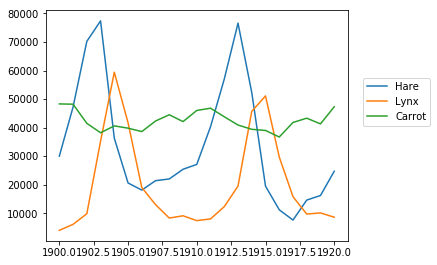

In [5]:
data = np.loadtxt('np_exercises_data/populations.txt')
year, hares, lynxes, carrots = data.T
plt.axes([0.2, 0.1, 0.7, 0.8]) # Left Bottom Width Height
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

In [6]:
# The mean and std of the populations of each species for the years in the period.
print(np.mean(data[:, 1:], axis = 0))
print(np.std(data[:, 1:], axis = 0))

[ 34080.95238095  20166.66666667  42400.        ]
[ 20897.90645809  16254.59153691   3322.50622558]


In [7]:
# Which year each species had the largest population.
data[np.argmax(data[:, 1:], axis = 0), [0]*3]

array([ 1903.,  1904.,  1900.])

In [8]:
# Which species has the largest population for each year.
max_species = np.argsort(-data[:, 1:], axis = 1)[:,0]
species = np.array(['Hare', 'Lynx', 'Carrot'])
np.array([year, species[max_species]]).T

array([['1900.0', 'Carrot'],
       ['1901.0', 'Carrot'],
       ['1902.0', 'Hare'],
       ['1903.0', 'Hare'],
       ['1904.0', 'Lynx'],
       ['1905.0', 'Lynx'],
       ['1906.0', 'Carrot'],
       ['1907.0', 'Carrot'],
       ['1908.0', 'Carrot'],
       ['1909.0', 'Carrot'],
       ['1910.0', 'Carrot'],
       ['1911.0', 'Carrot'],
       ['1912.0', 'Hare'],
       ['1913.0', 'Hare'],
       ['1914.0', 'Hare'],
       ['1915.0', 'Lynx'],
       ['1916.0', 'Carrot'],
       ['1917.0', 'Carrot'],
       ['1918.0', 'Carrot'],
       ['1919.0', 'Carrot'],
       ['1920.0', 'Carrot']], 
      dtype='|S32')

In [9]:
# Which years any of the populations is above 50000.
print(np.any(data[:,1:]>50000, axis = 1))
print(year[np.any(data[:,1:]>50000, axis = 1)])

[False False  True  True  True False False False False False False False
  True  True  True  True False False False False False]
[ 1902.  1903.  1904.  1912.  1913.  1914.  1915.]


In [10]:
# The top 2 years for each species when they had the lowest populations.
year[np.argsort(data[:,1:], axis=0)[:2,:]]

array([[ 1917.,  1900.,  1916.],
       [ 1916.,  1901.,  1903.]])

In [11]:
# Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. 
# Check correlation (see help(np.corrcoef)).
# print(hares)
hare_grad = np.gradient(hares, 1.0)
# print(hare_grad)
print(np.corrcoef(hare_grad, lynxes))

[[ 1.         -0.91792485]
 [-0.91792485  1.        ]]


## 1.3.5.4. Crude integral approximations

In [12]:
def f(a, b, c):
    return a**b - c

# samples = f(np.linspace(0, 1, 24)[:,np.newaxis,np.newaxis],
#             np.linspace(0, 1, 12)[np.newaxis,:,np.newaxis],
#             np.linspace(0, 1, 6)[np.newaxis,np.newaxis,:])

samples = f(*np.ogrid[0:1:24j, 0:1:12j, 0:1:6j])
print("Exact:", np.log(2) - 0.5)
print(samples.mean())

Exact: 0.19314718056
0.18884234603


## 1.3.5.5. Mandelbrot set

CPU times: user 24.8 s, sys: 181 ms, total: 25 s
Wall time: 25.2 s


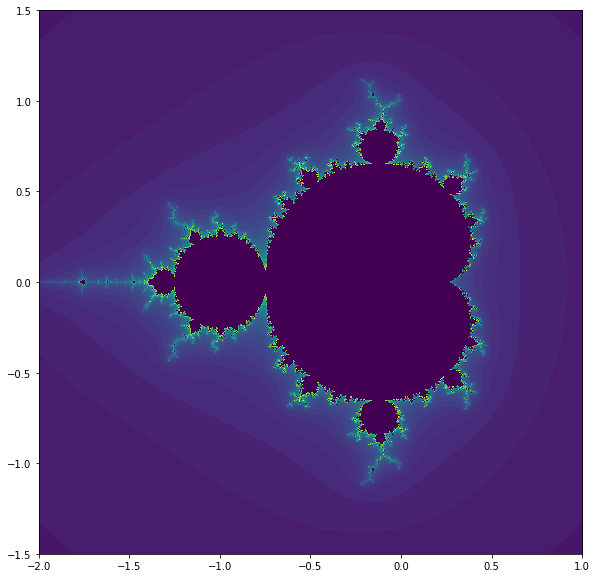

In [13]:
%%time
m_samples = (lambda x,y:x + 1j*y)(*np.ogrid[-2:1:600j, -1.5:1.5:600j])
def mandelbrot(c):
    z = 0
    for ct in range(50):
        if np.linalg.norm(z)>4:
            return ct
        z = z*z + c
    return -1
m_eval = np.vectorize(mandelbrot)(m_samples)
plt.figure(figsize=(20,10))
plt.imshow(m_eval.T, extent=[-2, 1, -1.5, 1.5])

/Users/alex/virtualenvs/tf/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in square
/Users/alex/virtualenvs/tf/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in square
/Users/alex/virtualenvs/tf/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


CPU times: user 159 ms, sys: 96.5 ms, total: 256 ms
Wall time: 255 ms


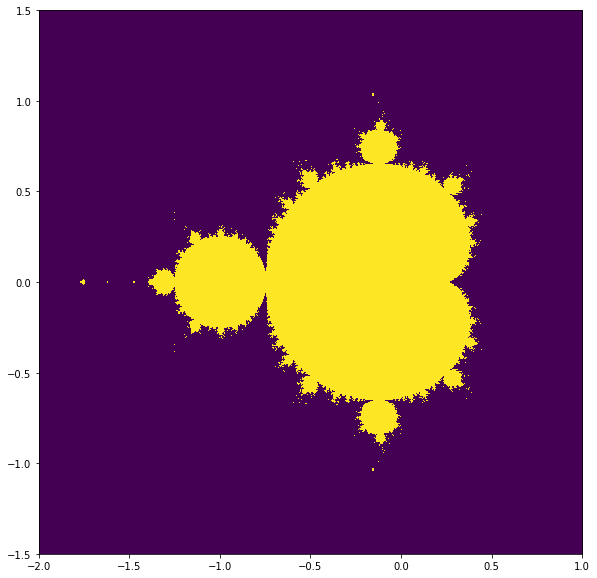

In [14]:
%%time
# Solution
def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)
    c = x[:,np.newaxis] + 1j*y[np.newaxis,:]
    # Mandelbrot iteration
    z = c
    for j in range(N_max):
        z = z**2 + c
    mandelbrot_set = (abs(z) < some_threshold)
    return mandelbrot_set
mandelbrot_set = compute_mandelbrot(50, 50., 600, 600)
plt.figure(figsize=(20,10))
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])

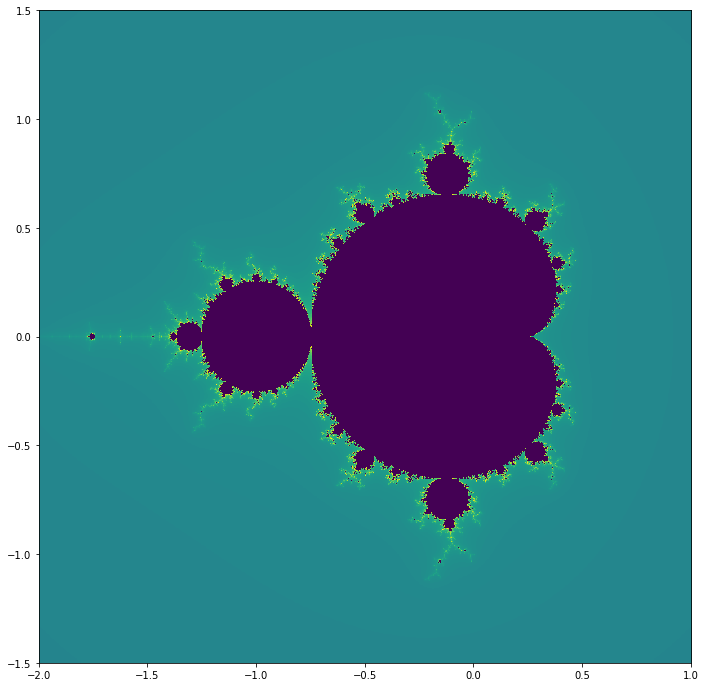

In [15]:
def mandelbrot2(nx, ny):
    x, y = np.ogrid[-2:1:nx*1j, -1.5:1.5:ny*1j]
    c = x + 1j*y; z = c.copy()
    mask = np.ones(z.shape, dtype=bool)
    mandelbrot = -np.ones(z.shape)*60
    for ct in range(80):
        contained = abs(z)<=4 # those still contained
        changed = np.logical_xor(mask, contained)
        mandelbrot[changed] = ct
        # mandelbrot[changed] = (- np.log2(np.log2(abs(z[changed]))) + ct)
        yield mandelbrot.copy()
        mask &= contained
        z[contained] = z[contained]**2 + c[contained]

mandelbrot2_slices = list(mandelbrot2(800, 800))
plt.figure(figsize=(12,12))
plt.imshow(mandelbrot2_slices[75].T, extent=[-2, 1, -1.5, 1.5])
plt.savefig('mandelbrot.png')

In [16]:
def show_mandelbrot((sx, ex, sy, ey), (nx, ny), Nmax):
    x, y = np.ogrid[sx:ex:nx*1j, sy:ey:ny*1j]
    c = x + 1j*y; z = c.copy()
    mask = np.ones(z.shape, dtype=bool)
    mandelbrot = -np.ones(z.shape)*60
    for ct in range(Nmax):
        contained = abs(z)<=4
        changed = np.logical_xor(mask, contained)
        mandelbrot[changed] = ct
        mask &= contained
        z[contained] = z[contained]**2 + c[contained]
    def _show(**kargs):
        kargs.update(dict(extent=(sx, ex, sy, ey), origin='lower'))
        plt.figure(figsize=(12,12))
        plt.imshow(mandelbrot.T, **kargs)
        return _show
    return _show
# cmap ref: http://matplotlib.org/examples/color/colormaps_reference.html

<function __main__._show>

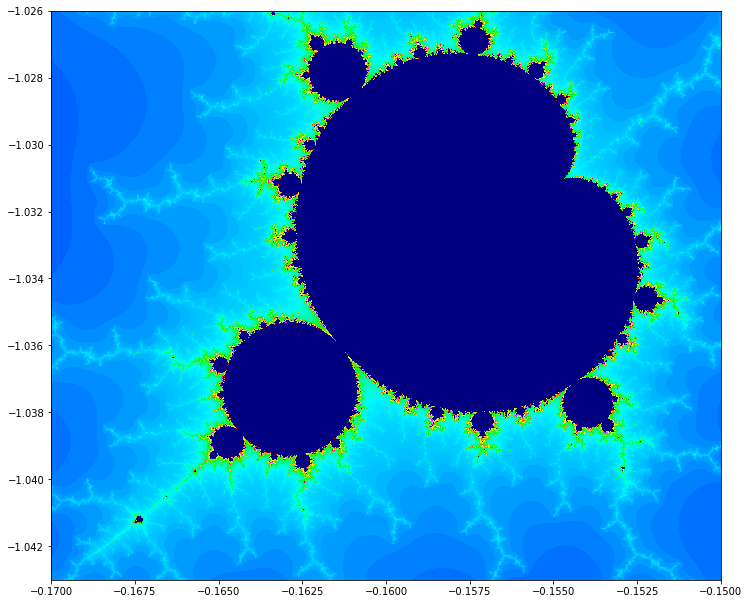

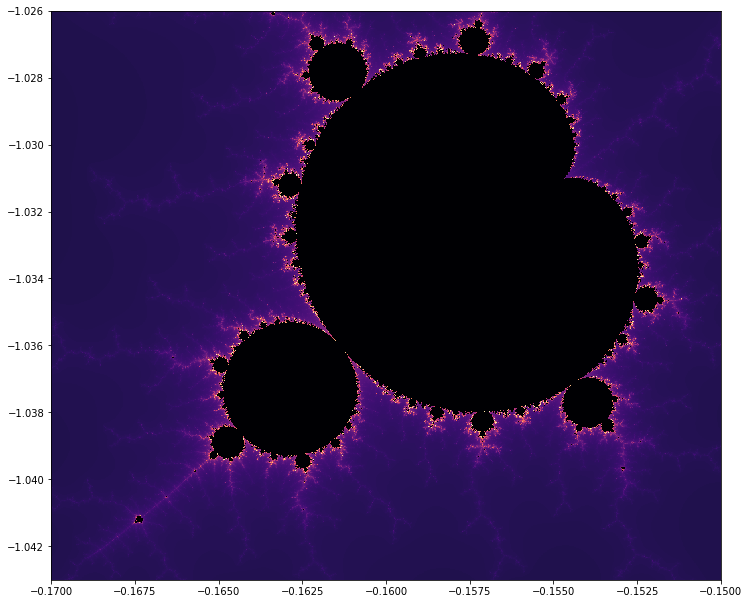

In [17]:
show_mandelbrot((-0.17, -0.15, -1.043, -1.026), (1000, 1000), 500)(cmap = 'gist_ncar')(cmap = 'magma')

<function __main__._show>

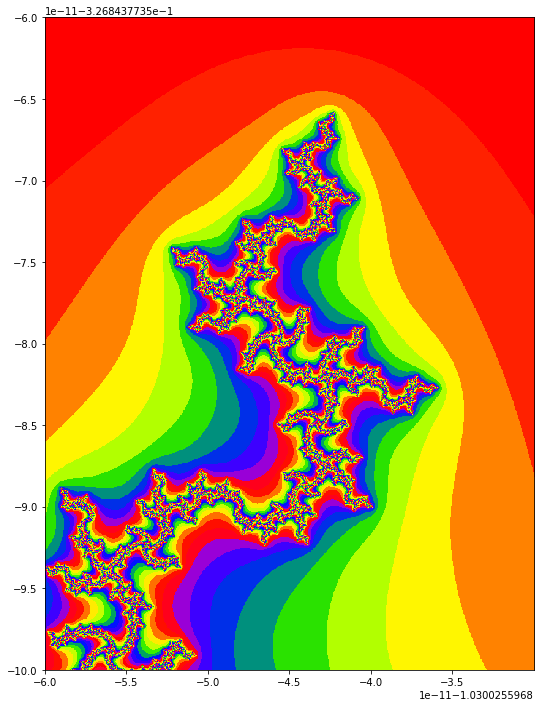

In [18]:
show_mandelbrot((-1.03002559686, -1.03002559683, -0.3268437736, -0.32684377356), (800, 800), 300)(cmap = 'prism')

## 1.3.5.6. Markov chain

In [21]:
P = np.random.rand(5, 5)
P /= P.sum(axis=1)[:,np.newaxis]
s = np.random.rand(5)
s /= s.sum()

a = np.dot(s, np.linalg.matrix_power(P, 50))
print(a)

# Compute stationary state
L, X = np.linalg.eig(P.T)
b = X[:,np.argmin(abs(L - 1.0))].real
b /= b.sum()
print(b)

# Compare
if all(abs(a - b) < 1e-5):
    print("Tolerance satisfied in infty-norm")

if np.linalg.norm(a - b) < 1e-5:
    print("Tolerance satisfied in 2-norm")


[ 0.17697787  0.26930618  0.12698116  0.242106    0.18462879]
[ 0.17697787  0.26930618  0.12698116  0.242106    0.18462879]
Tolerance satisfied in infty-norm
Tolerance satisfied in 2-norm
